In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 1. Data Cleaning & EDA
* Load and explore dataset
* Handle missing values, data types, and class balance
* Analyze feature relationships with the target

In [2]:
df = pd.read_csv('data/heart.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


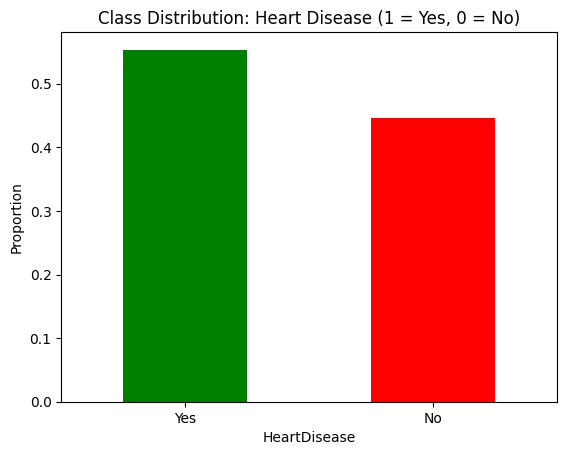

In [8]:
# Check class distribution
df['HeartDisease'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution: Heart Disease (1 = Yes, 0 = No)')
plt.xticks([0,1], ['Yes', 'No'], rotation=0)
plt.ylabel('Proportion')
plt.show()

fig = px.histogram(df, x="HeartDisease", color="HeartDisease", barmode="group",
                   color_discrete_map={0: 'green', 1: 'red'},
                   title="Heart Disease Distribution (0 = No, 1 = Yes)")
fig.show()



In [11]:
# Check how categorical features relate to the target
for col in ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    fig = px.histogram(df, x=col, color="HeartDisease", barmode="group",
                       title=f"{col} vs Heart Disease",
                       color_discrete_map={0: 'green', 1: 'red'})
    fig.show()


In [ ]:
# # Check how categorical features relate to the target
# categorical = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# for col in categorical:
#     sns.countplot(x=col, hue='HeartDisease', data=df, palette='pastel')
#     plt.title(f'{col} vs Heart Disease')
#     plt.xticks(rotation=30)
#     plt.tight_layout()
#     plt.show()


In [ ]:
# Check how numerical features relate to the target with boxplots 
for col in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    fig = px.box(df, x="HeartDisease", y=col, color="HeartDisease",
                 color_discrete_map={0: 'green', 1: 'red'},
                 title=f"{col} by Heart Disease")
    fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['No', 'Yes']))
    fig.show()


In [14]:
# Check how numerical features relate to the target with boxplots
# numerical = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# for col in numerical:
#     sns.boxplot(x='HeartDisease', y=col, data=df, palette='coolwarm')
#     plt.title(f'{col} by Heart Disease')
#     plt.show()


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
corr_matrix = df_encoded.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale='RdBu',
    showscale=True)
fig.update_layout(title="Correlation Heatmap", height=800)
fig.show()


# 2. Feature Engineering & ML
* Scale & encode features if necessary
* Train/test split
* Try models: Logistic Regression, Random Forest, XGBoost
* Evaluate using Accuracy, ROC-AUC, Precision-Recall

In [18]:
# Define features and target variable
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [20]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/Users/mac/heart failure/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning:

[10:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




In [22]:
# Evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name} Evaluation")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_pred), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)


evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


📊 Logistic Regression Evaluation
Accuracy: 0.886
Precision: 0.872
Recall: 0.931
ROC-AUC: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

--------------------------------------------------
📊 Random Forest Evaluation
Accuracy: 0.875
Precision: 0.883
Recall: 0.892
ROC-AUC: 0.873

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

--------------------------------------------------
📊 XGBoost E

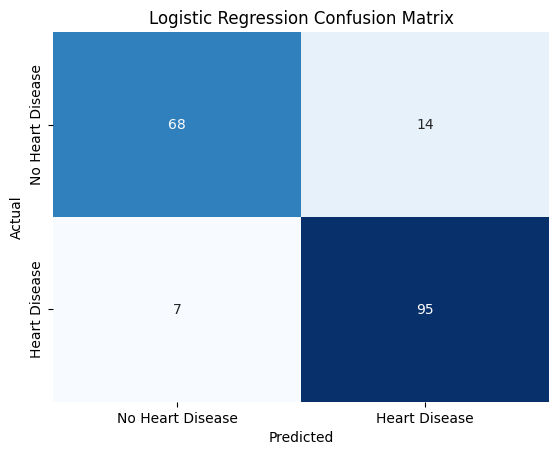

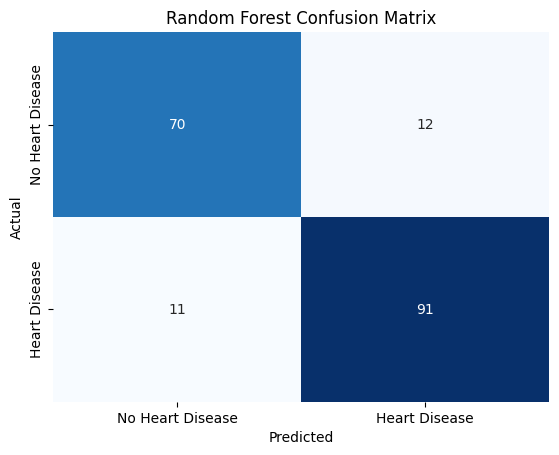

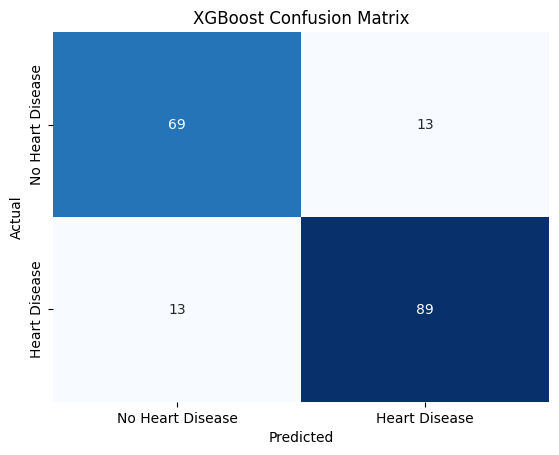

In [23]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")

# 3. Model Explainability
* SHAP / LIME plots
* Feature importance
* Summary plots for doctors to interpret

In [ ]:
import shap

# Only needed once per session
shap.initjs()


ImportError: Numba needs NumPy 2.2 or less. Got NumPy 2.3.

In [ ]:
# SHAP values for Logistic Regression
explainer_lr = shap.LinearExplainer(lr, X_train_scaled)
shap_values_lr = explainer_lr.shap_values(X_test_scaled)
shap.summary_plot(shap_values_lr, X_test, plot_type="bar", max_display=10)
# SHAP values for Random Forest
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", max_display=10)
# SHAP values for XGBoost
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar", max_display=10)